# **Import Necessary Libraries**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
data = pd.read_csv('/content/complaints.csv', low_memory=False)
print("Columns in the dataset:")
print(data.columns)
data.rename(columns={'_source.issue': 'inquiry_text', '_source.product': 'category'}, inplace=True)
print(data[['inquiry_text', 'category']].head())
data.dropna(subset=['inquiry_text', 'category'], inplace=True)
X = data['inquiry_text']
y = data['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF and Naive Bayes classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95)),
    ('clf', MultinomialNB())
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

Columns in the dataset:
Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')
                         inquiry_text                     category
0   Attempts to collect debt not owed              Debt collection
1     Written notification about debt              Debt collection
2  Other features, terms, or problems  Credit card or prepaid card
3      Trouble during payment process                     Mortgage
4                    Fees or interest  Credit card or prepaid card


# **Real-time Classification Function**
# **Define a function for real-time classification of new inquiries.**

# **Insights on Common Inquiries (Keyword Extraction)**
# Analyze keywords to identify trends in customer inquiries.

# **Hyperparameter Tuning with GridSearchCV**

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])
# Define parameter grid
param_grid = {
    'tfidf__max_df': [0.75, 0.85, 0.95],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': [0.1, 0.5, 1.0]
}
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'clf__alpha': 0.1, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 2)}
Best Score: 0.945578231292517


# **You can add these models to your existing pipeline, which helps manage preprocessing (TF-IDF) and model training in one step.**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english', max_df=0.95)),
    ('clf', LogisticRegression(solver='liblinear', C=1.0))
])
# Train the logistic regression model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9573291871814805


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       1.00      1.00      1.00      1203
                                                 Checking or savings account       0.92      1.00      0.95      2117
                                                               Consumer Loan       0.68      1.00      0.81       138
                                                                 Credit card       0.96      1.00      0.98      1321
                                                 Credit card or prepaid card       1.00      0.85      0.92      1914
                                                            Credit reporting       1.00      0.88      0.94        17
Credit reporting, credit repair services, or other personal consumer reports       0.84      1.00      0.91       724
                                                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('/content/complaints.csv')

data_filtered = data.dropna(subset=['_source.issue', '_source.product'])
X = data_filtered['_source.issue']
y = data_filtered['_source.product']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Define the pipeline with TF-IDF and Naive Bayes
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_df=0.85, ngram_range=(1, 2))),
    ('clf', MultinomialNB(alpha=0.5))
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy, report, conf_matrix


<ipython-input-11-4a33bfb0e508>:6: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/complaints.csv')


(0.9732272069464544,
 '                                                                              precision    recall  f1-score   support\n\n                                                     Bank account or service       1.00      1.00      1.00      2897\n                                                 Checking or savings account       1.00      1.00      1.00      3625\n                                                               Consumer Loan       0.71      0.99      0.83       325\n                                                                 Credit card       0.96      0.98      0.97      3166\n                                                 Credit card or prepaid card       1.00      0.95      0.98      3158\n                                                            Credit reporting       1.00      0.93      0.97        46\nCredit reporting, credit repair services, or other personal consumer reports       0.82      1.00      0.90      1325\n                       

#	**Provide insights into the most common types of inquiries and their associated keywords to inform support staff training and product/service improvements**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
# Fit a CountVectorizer to find the most common words in each category
vectorizer = CountVectorizer(stop_words='english', max_features=10)
# Transform and print top keywords for each category
for category in data['category'].unique():
    cat_data = data[data['category'] == category]['inquiry_text']
    cat_keywords = vectorizer.fit_transform(cat_data)
    print(f"Top keywords for '{category}':", vectorizer.get_feature_names_out())


Top keywords for 'Debt collection': ['attempts' 'collect' 'communication' 'cont' 'debt' 'disclosure'
 'notification' 'owed' 'tactics' 'written']
Top keywords for 'Credit card or prepaid card': ['account' 'card' 'credit' 'features' 'problem' 'problems' 'purchase'
 'shown' 'statement' 'terms']
Top keywords for 'Mortgage': ['account' 'collection' 'escrow' 'foreclosure' 'loan' 'modification'
 'mortgage' 'payments' 'process' 'servicing']
Top keywords for 'Checking or savings account': ['account' 'caused' 'charging' 'closing' 'company' 'funds' 'lender'
 'managing' 'opening' 'problem']
Top keywords for 'Credit reporting, credit repair services, or other personal consumer reports': ['company' 'credit' 'existing' 'improper' 'incorrect' 'information'
 'investigation' 'problem' 'report' 'use']
Top keywords for 'Vehicle loan or lease': ['end' 'information' 'lease' 'loan' 'managing' 'pay' 'problem' 'problems'
 'report' 'struggling']
Top keywords for 'Money transfer, virtual currency, or money servi

# **classifies incoming support tickets in real-time and routes them to the appropriate support teams.**

In [4]:
def classify_inquiry(inquiry_text):
    """Classifies a single inquiry into a category."""
    return pipeline.predict([inquiry_text])[0]
# Test the function
sample_inquiry = "How do I reset my password?"
print("Category:", classify_inquiry(sample_inquiry))


Category: Mortgage


#**# APPLYING ALL THE MODELS TOGETHER WE FOUND OUT THAT WHILE UISNG XGBOOST THE XGBOOST CLASSIFIER WAS EXPECTING NUMERICAL LABELS (E.G. INTEGERS) BUT OUT DATASET HAD CATEGORIAL DATA SO WE CONVERTED THE STRING INTO NUMERIC**

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Define model options with parameter grids for each
models = {
    'Logistic Regression': (LogisticRegression(), {'clf__C': [0.1, 1.0, 10]}),
    'Random Forest': (RandomForestClassifier(), {'clf__n_estimators': [50, 100], 'clf__max_depth': [10, 20]}),
    'SVM': (SVC(), {'clf__C': [0.1, 1.0], 'clf__kernel': ['linear', 'rbf']}),
    'XGBoost': (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'), {'clf__n_estimators': [50, 100], 'clf__max_depth': [3, 5]})
}
# Evaluate each model
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")

    pipeline = Pipeline([
        ('tfidf', TfidfVectorizer(max_df=0.85, ngram_range=(1, 2))),
        ('clf', model)
    ])
    grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train_encoded)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_labels = label_encoder.inverse_transform(y_pred)
    accuracy = accuracy_score(y_test_encoded, y_pred)

    print(f"{model_name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred_labels))
    print("\n")


Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.9761


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       1.00      1.00      1.00      2897
                                                 Checking or savings account       1.00      1.00      1.00      3625
                                                               Consumer Loan       0.71      0.99      0.83       325
                                                                 Credit card       0.96      1.00      0.98      3166
                                                 Credit card or prepaid card       1.00      0.95      0.98      3158
                                                            Credit reporting       1.00      0.98      0.99        46
Credit reporting, credit repair services, or other personal consumer reports       0.86      1.00      0.92      1325
                                                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       1.00      1.00      1.00      2897
                                                 Checking or savings account       1.00      1.00      1.00      3625
                                                               Consumer Loan       0.72      0.77      0.75       325
                                                                 Credit card       0.69      1.00      0.82      3166
                                                 Credit card or prepaid card       1.00      0.90      0.95      3158
                                                            Credit reporting       0.00      0.00      0.00        46
Credit reporting, credit repair services, or other personal consumer reports       0.86      0.97      0.91      1325
                                                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                              precision    recall  f1-score   support

                                                     Bank account or service       1.00      1.00      1.00      2897
                                                 Checking or savings account       1.00      1.00      1.00      3625
                                                               Consumer Loan       0.71      0.99      0.83       325
                                                                 Credit card       0.96      1.00      0.98      3166
                                                 Credit card or prepaid card       1.00      0.96      0.98      3158
                                                            Credit reporting       1.00      0.98      0.99        46
Credit reporting, credit repair services, or other personal consumer reports       0.86      1.00      0.92      1325
                                                       

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:08:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9762
                                                                              precision    recall  f1-score   support

                                                     Bank account or service       1.00      1.00      1.00      2897
                                                 Checking or savings account       1.00      1.00      1.00      3625
                                                               Consumer Loan       0.71      0.99      0.83       325
                                                                 Credit card       0.96      1.00      0.98      3166
                                                 Credit card or prepaid card       1.00      0.95      0.98      3158
                                                            Credit reporting       1.00      0.98      0.99        46
Credit reporting, credit repair services, or other personal consumer reports       0.86      1.00      0.92      1325
                              

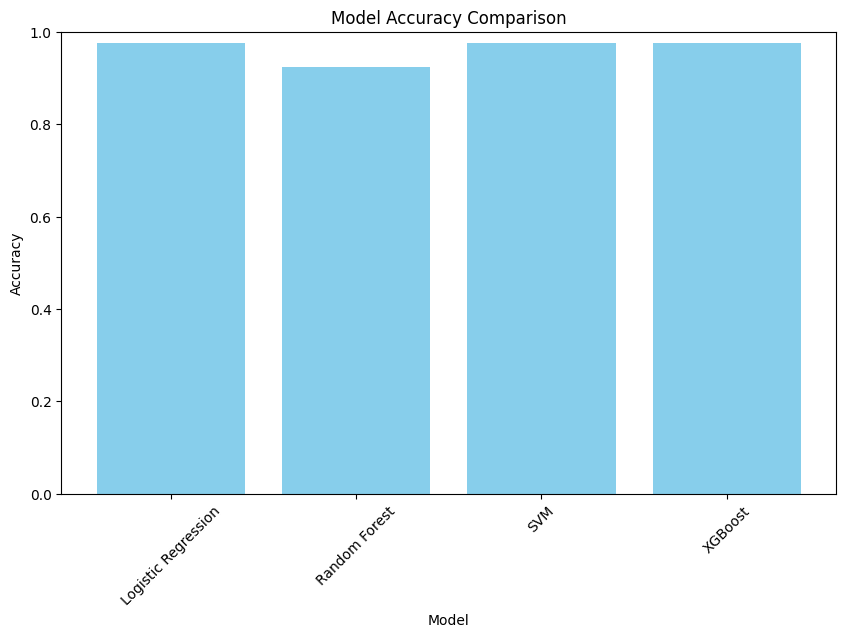

In [15]:
import matplotlib.pyplot as plt
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost']
accuracies = [0.9761, 0.9246, 0.9763, 0.9762]
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.show()
